In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## Portfolio Assignment week 01

Study the Tutorial tutorial_cluster_scanpy_object and the tutorial_Clustering_Methods

Write a brief summary about the following:

-	What are common preprocessing steps? Explain for each step why and when you should execute this step and when not.
-	What visualization methods are used in the cluster methods tutorial? Explain why the selected method is the most appropriate method for the visualization. Bonus points: do this as well for the scanpy tutorial.
-	What performance/evaluation metrics are in the cluster methods tutorial? Explain why the used methods are the most appropriate method for the evaluation.


Bonus:
You practice the steps yourself with the breast_cancer dataset (clustering_data.csv)

#### 1:
        Scaling the data.
        Checking for NAN
        Checking if there is a column for colouring
        Understading the data what does each column mean
        Checking the typess

#### 2:
        kmeans is what they use. reason might be that we want to see which wine type cluster to gather based on location
        for the scanpy tutorial PCA is used reason is that we want to cluster based on similarity of the columns and than uses the nearest neigbor to cluster.
        this is one way of doing it because pont that are closer togheter will be seen as a cluster

#### 3:


In [9]:
df = pd.read_csv("/homes/memartinus/Desktop/DS2_machine_learning/clustering_data.csv") 


In [10]:
# check for nas
for col in df.columns:
    percentage = 100/len(df[col]) * len(df[col].dropna())
    print(f"{col:>12}: {percentage:.2f}%")
# the last coloumn needs to be deleted becasue it has no numbers


          id: 100.00%
   diagnosis: 100.00%
 radius_mean: 100.00%
texture_mean: 100.00%
perimeter_mean: 100.00%
   area_mean: 100.00%
smoothness_mean: 100.00%
compactness_mean: 100.00%
concavity_mean: 100.00%
concave points_mean: 100.00%
symmetry_mean: 100.00%
fractal_dimension_mean: 100.00%
   radius_se: 100.00%
  texture_se: 100.00%
perimeter_se: 100.00%
     area_se: 100.00%
smoothness_se: 100.00%
compactness_se: 100.00%
concavity_se: 100.00%
concave points_se: 100.00%
 symmetry_se: 100.00%
fractal_dimension_se: 100.00%
radius_worst: 100.00%
texture_worst: 100.00%
perimeter_worst: 100.00%
  area_worst: 100.00%
smoothness_worst: 100.00%
compactness_worst: 100.00%
concavity_worst: 100.00%
concave points_worst: 100.00%
symmetry_worst: 100.00%
fractal_dimension_worst: 100.00%
 Unnamed: 32: 0.00%


In [17]:
values = df.drop(columns=["Unnamed: 32", "id"])

In [18]:
values

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
targets = list(df["diagnosis"]) # use this for coloring later

values = values.drop(columns=["diagnosis"]) #setting the values

In [20]:
# scale the data

pca = PCA()
scaler = StandardScaler()
scaled_df=values.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

pca_features = pca.fit_transform(scaled_df)

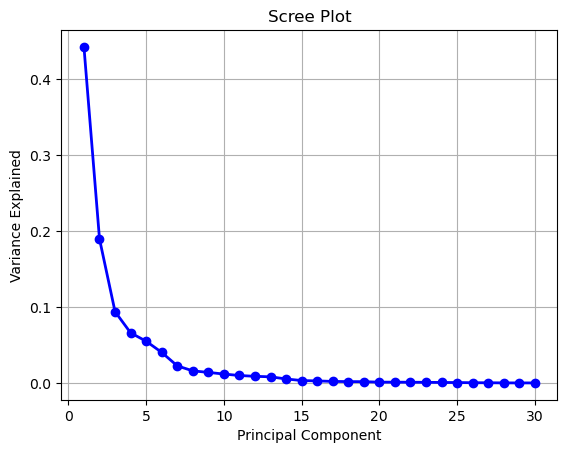

PC component 1 captures 0.44272025607526294
PC component 2 captures 0.18971182044033105
PC component 3 captures 0.09393163257431392
PC component 4 captures 0.06602134915470166
PC component 5 captures 0.05495768492346274
PC component 6 captures 0.04024522039883342
PC component 7 captures 0.022507337129825094
PC component 8 captures 0.015887238000213307
PC component 9 captures 0.0138964937455911
PC component 10 captures 0.011689781894131496
PC component 11 captures 0.009797189875980182
PC component 12 captures 0.008705379007378835
PC component 13 captures 0.008045249871967334
PC component 14 captures 0.00523365745492635
PC component 15 captures 0.003137832167627399
PC component 16 captures 0.002662093365152317
PC component 17 captures 0.001979967925324271
PC component 18 captures 0.0017539594502263593
PC component 19 captures 0.0016492530592251639
PC component 20 captures 0.001038646748338704
PC component 21 captures 0.0009990964637002521
PC component 22 captures 0.0009146467510543457
PC

In [21]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

for i, component in enumerate( pca.explained_variance_ratio_):
    print(f"PC component {i+1} captures {pca.explained_variance_ratio_[i]}")
# based on this we going to use the 2 components 

In [22]:
pca = PCA(n_components=2)
scaler = StandardScaler()
scaled_df=values.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

pca_features = pca.fit_transform(scaled_df)

#Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   

 
pca_df["groups"] = targets

In [23]:
pca_df

,PC1,PC2,groups
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


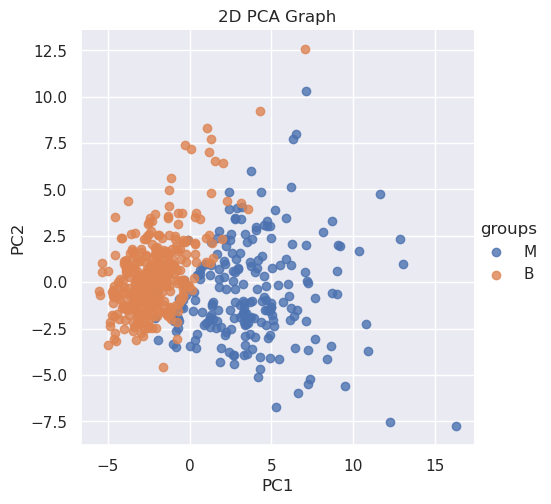

In [24]:
# use Seaborn to plot the data adn color them wuth the targets 

import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='groups', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [29]:
#using the K means way
### BEGIN SOLUTION
float_columns = [x for x in values.columns]

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(values[float_columns]) # not including quality or color columns

values['kmeans'] = km.predict(values[float_columns]) #create a new column with result



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,kmeans
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


/commons/conda/dsls/lib/python3.10/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


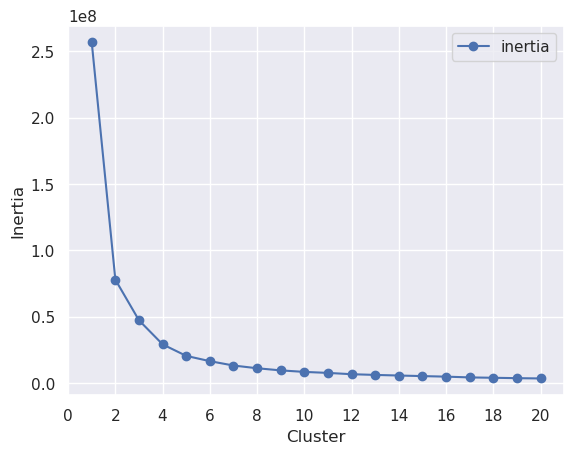

In [30]:

# Create and fit a range of models store cliuster numbers, inertia and model is series object
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(values[float_columns])

    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION



done